# Dominant color identification of an image using compression method.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
import pprint

%matplotlib inline
path=r"C:\Users\TIRTHA\Downloads\images\photo-1579546929662-711aa81148cf.jpg"

In [38]:
def get_image(image_path,new_shape=(3,3),plot_original=False,plot_resized=True):
    image_path=image_path.replace("\\","/")
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, new_shape, interpolation = cv2.INTER_AREA)
    flatten_image = resized_image.reshape(resized_image.shape[0]*resized_image.shape[1], 3)
    
    if plot_original:
        plt.axis('off')
        plt.imshow(image)
        plt.title("Inserted image : "+image_path.split("/")[-1])
        
    if plot_resized:
        plt.axis('off')
        plt.imshow(resized_image)
        plt.title("Inserted image : "+image_path.split("/")[-1])
        
    return resized_image,flatten_image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_nearest_colors(act_color,rest_color):
    
    best_dist=[]
    for rcolor in rest_color:
        rdiff=act_color[0]-rcolor[0]
        gdiff=act_color[1]-rcolor[1];
        bdiff=act_color[2]-rcolor[2];
        distance = rdiff**2 + gdiff**2 + bdiff**2
        if distance<=7000:
            best_dist.append(distance)
    if len(best_dist) > 0:   
        return [best_dist,len(best_dist),sum(best_dist)/len(best_dist)]
    else:
        return None

    
    
def get_dominent_color(image_pixels):
    
    
    value_list=[]
    best_dict={}
    max_sim=0
    for i in range(len(image_pixels)):
        temp_list=image_pixels.tolist()
        temp_list.pop(i)
        data=get_nearest_colors(image_pixels[i],temp_list)
#         print(i)
        if(data!=None):
            data.append(i)
#             print(i)
            if(data[1]>max_sim):
                max_sim=data[1]

            best_dict[tuple(image_pixels[i])]=data
        
#     pprint.pprint(best_dict)
    best_diff=10000
    dom_color=""
    for color in best_dict.keys():
        if(best_dict[color][1]==max_sim and best_dict[color][2]<best_diff):
            
            best_diff=best_dict[color][2]
            dom_color=color
    

    return {"dom_color_inRGB":dom_color,"dom_color_inHEX":RGB2HEX(dom_color)}

C:/Users/TIRTHA/Downloads/images/photo-1579546929662-711aa81148cf.jpg
Wall time: 28 ms


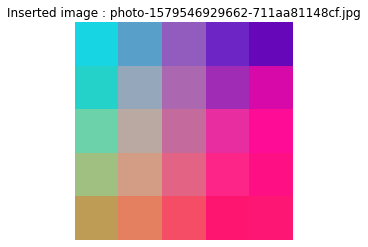

In [43]:
%%time
modified_image,image_pixels=get_image(path,new_shape=(5,5),plot_original=False,plot_resized=True)

In [44]:
%%time

result=get_dominent_color(image_pixels)


Wall time: 5 ms


{'dom_color_inHEX': '#e82da0', 'dom_color_inRGB': (232, 45, 160)}


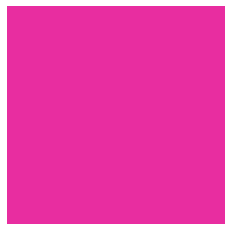

In [45]:
pprint.pprint(result)
dom_color_block=np.full((5,5,3),result["dom_color_inRGB"])

plt.axis('off')
plt.imshow(dom_color_block)
plt.show()

In [7]:
# !explorer .
